In [83]:
import os.path

import numpy as np
import pandas as pd

In [84]:
classesDict = {
    "T1":0,
    "T1_c":1,
    "T2":2,
    "T2-FLAIR":3,
    "PD":4,
    "SWI":5,
    "GRE":6,
    "T2*":7,
    "DWI":8,
    "ADC":9,
    "BOLD":10,
    "angio":11,
    "PWI":12,
    "ASL":13,
    "DTI":14,
    "Other":15
}

In [109]:
train_labels_path = 'combinedDfs/CombinedTrainingFrame_A2_A3_O3_egd_rss_hb_pruned.txt'
test_labels_path = 'combinedDfs/CombinedTestingFrame_A2_A3_O3_egd_rss_hb_pruned.txt'

In [110]:
train_labels = pd.read_csv(train_labels_path,names=['ID','label','extra'],sep='\t', dtype={'ID':str,'label':int,'extra':int})
test_labels = pd.read_csv(test_labels_path,names=['ID','label','extra'],sep='\t', dtype={'ID':str,'label':int,'extra':int})

In [111]:
Label_name_list = list(classesDict.keys())

In [113]:
Labels = pd.concat((train_labels, test_labels), axis=0)
Labels

,ID,label,extra
0,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,3,0
1,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,7,0
2,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,0,0
3,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,3,0
4,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,15,0
...,...,...,...
62665,/trinity/home/r098375/DDS/data/HeartBrain/NIFT...,0,0
62666,/trinity/home/r098375/DDS/data/HeartBrain/NIFT...,0,0
62667,/trinity/home/r098375/DDS/data/HeartBrain/NIFT...,0,0
62668,/trinity/home/r098375/DDS/data/HeartBrain/NIFT...,0,0


In [114]:
def extractDataset(ID):
    if 'ADNI2' in ID:
        return 'ADNI2'
    elif 'ADNI3' in ID:
        return 'ADNI3'
    elif 'OASIS3' in ID:
        return 'OASIS3'
    elif 'egd' in ID:
        return 'egd'
    elif 'Rstudy' in ID:
        return 'rss'
    elif 'HeartBrain' in ID:
        return 'HeartBrain'
    return None

def assignStringLabel(label, labelList):
    return labelList[label]

In [115]:
FullLabelFrame = Labels.copy()

In [116]:
FullLabelFrame['dataset'] = FullLabelFrame['ID'].apply(extractDataset)
FullLabelFrame['string_label'] = FullLabelFrame['label'].apply(assignStringLabel, labelList=Label_name_list)

In [117]:
FullLabelFrame.groupby('dataset')['string_label'].value_counts()/15

dataset     string_label
ADNI2       PD               225.0
            T2               225.0
ADNI3       Other           5791.0
            T2*             3978.0
            T1              2326.0
            T2-FLAIR        2013.0
            PWI              971.0
            ASL              377.0
            DTI               82.0
            SWI               17.0
            PD                 2.0
HeartBrain  Other            838.0
            PWI              281.0
            ASL              242.0
            SWI              215.0
            T1               173.0
OASIS3      Other           5758.0
            BOLD            3017.0
            T2              2483.0
            T1              2390.0
            DWI             2009.0
            T2*             1414.0
            ASL              940.0
            SWI              812.0
            T2-FLAIR         757.0
            angio            557.0
            GRE              437.0
egd         DWI              4

In [118]:
print((FullLabelFrame.groupby('string_label')['dataset'].value_counts()/15).to_latex())

\begin{tabular}{llr}
\toprule
 &  & count \\
string_label & dataset &  \\
\midrule
ADC & egd & 113.000000 \\
\cline{1-3}
\multirow[t]{5}{*}{ASL} & OASIS3 & 940.000000 \\
 & ADNI3 & 377.000000 \\
 & HeartBrain & 242.000000 \\
 & rss & 6.000000 \\
 & egd & 2.000000 \\
\cline{1-3}
\multirow[t]{2}{*}{BOLD} & OASIS3 & 3017.000000 \\
 & rss & 17.000000 \\
\cline{1-3}
\multirow[t]{3}{*}{DTI} & ADNI3 & 82.000000 \\
 & rss & 78.000000 \\
 & egd & 1.000000 \\
\cline{1-3}
\multirow[t]{2}{*}{DWI} & OASIS3 & 2009.000000 \\
 & egd & 453.000000 \\
\cline{1-3}
GRE & OASIS3 & 437.000000 \\
\cline{1-3}
\multirow[t]{5}{*}{Other} & ADNI3 & 5791.000000 \\
 & OASIS3 & 5758.000000 \\
 & HeartBrain & 838.000000 \\
 & rss & 109.000000 \\
 & egd & 60.000000 \\
\cline{1-3}
\multirow[t]{4}{*}{PD} & ADNI2 & 225.000000 \\
 & rss & 26.000000 \\
 & egd & 3.000000 \\
 & ADNI3 & 2.000000 \\
\cline{1-3}
\multirow[t]{3}{*}{PWI} & ADNI3 & 971.000000 \\
 & HeartBrain & 281.000000 \\
 & egd & 126.000000 \\
\cline{1-3}
\mult

In [94]:
vc = pd.DataFrame(FullLabelFrame.groupby('string_label')['dataset'].value_counts())

In [95]:
vc

count
string_label dataset          
ADC          egd           300
ASL          OASIS3       1620
             ADNI3         735
             HeartBrain    465
             egd            15
BOLD         OASIS3       4965
             rss            30
DTI          rss           120
             ADNI3         120
DWI          OASIS3       3240
             egd           765
GRE          OASIS3       1440
Other        OASIS3       8445
             ADNI3        8370
             HeartBrain   1305
             egd           150
             rss            90
PD           ADNI2         420
             rss            30
PWI          ADNI3        1455
             HeartBrain    495
             egd           315
SWI          OASIS3       1215
             HeartBrain    375
             ADNI3          45
             rss            30
T1           ADNI3        3570
             OASIS3       3450
             egd           450
             HeartBrain    195
             rss            30
T1_c         egd           600
T2           OASIS3       3810
             ADNI2         420
             egd           315
T2*          ADNI3        5595
             OASIS3       2175
T2-FLAIR     ADNI3        3240
             OASIS3       1215
angio        OASIS3       1050

In [96]:
first_level_labels = []
second_level_labels = []
first_level_counts = []
second_level_counts = []
for idx in vc.index:
    firstLevel = idx[0]
    secondLevel = idx[1]
    count = vc.loc[idx,'count']
    if firstLevel not in first_level_labels:
        first_level_labels.append(firstLevel)
        second_level_labels.append(secondLevel)
        first_level_counts.append(count)
        second_level_counts.append(count)
    else:
        second_level_counts.append(count)
        second_level_labels.append(secondLevel)
        first_level_counts[-1] += count
unique_second_level = list(set(second_level_labels))

In [97]:
second_level_colors = [unique_second_level.index(x) for x in second_level_labels]

In [98]:
second_level_colors = np.multiply(second_level_colors,int(np.floor(20/max(second_level_colors))))

In [99]:
second_level_colors

array([16, 20,  8,  0, 16, 20,  4,  4,  8, 20, 16, 20, 20,  8,  0, 16,  4,
       12,  4,  8,  0, 16, 20,  0,  8,  4,  8, 20, 16,  0,  4, 16, 20, 12,
       16,  8, 20,  8, 20, 20])

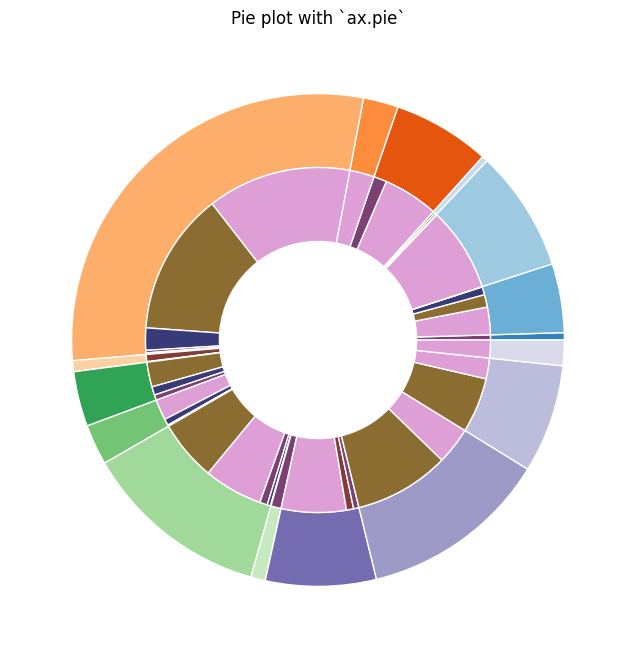

In [100]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))

size = 0.3

cmap_outer = plt.colormaps["tab20c"]
cmap_inner = plt.colormaps['tab20b']
outer_colors = cmap_outer(np.arange(len(first_level_labels)))
inner_colors = cmap_inner(second_level_colors)

ax.pie(first_level_counts, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(second_level_counts, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [101]:
labels = FullLabelFrame['string_label'].unique()

In [102]:
datasets = FullLabelFrame[FullLabelFrame['string_label']==labels[0]]['dataset'].unique()

In [103]:
FullLabelFrame['center_slide'] = FullLabelFrame['ID'].apply(lambda x: '__s12' in x)

In [104]:
VisualizeFrame = FullLabelFrame[FullLabelFrame['center_slide']]

In [105]:
# create a frame that contains labels for some visualizations
from sklearn.model_selection import train_test_split
visualize_frame = pd.DataFrame()
for label in labels:
    temp1 = VisualizeFrame[VisualizeFrame['string_label']==label]
    datasets = temp1['dataset'].unique()
    for dataset in datasets:
        df = temp1[temp1['dataset']==dataset]
        try:
            visualize, _ = train_test_split(df, train_size=2, shuffle=True, random_state=42)
        except ValueError:
            visualize = df
        visualize_frame = pd.concat([visualize_frame,visualize], axis=0)

In [106]:
visualize_frame

,ID,label,extra,dataset,string_label,center_slide
18886,/trinity/home/r098375/DDS/data/ADNI/ADNI3/test...,3,0,ADNI3,T2-FLAIR,True
10793,/trinity/home/r098375/DDS/data/ADNI/ADNI3/test...,3,0,ADNI3,T2-FLAIR,True
31159,/trinity/home/r098375/DDS/data/OASIS/OASIS3/te...,3,0,OASIS3,T2-FLAIR,True
44777,/trinity/home/r098375/DDS/data/OASIS/OASIS3/te...,3,0,OASIS3,T2-FLAIR,True
17546,/trinity/home/r098375/DDS/data/ADNI/ADNI3/test...,15,0,ADNI3,Other,True
...,...,...,...,...,...,...
58532,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,8,0,egd,DWI,True
58623,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,1,0,egd,T1_c,True
59345,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,1,0,egd,T1_c,True
58846,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,9,0,egd,ADC,True


In [107]:
# visualize_frame.to_csv('visualizeFrame.csv', index=False)